In [125]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [183]:
img = cv2.imread("../images/bus.png",0)

# img = scipy.ndimage.rotate(img, 30)
imgo = np.copy(img)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


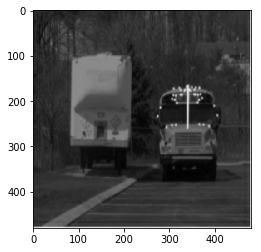

In [184]:
plt.imshow(img, cmap='gray')

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.]
(480, 180)


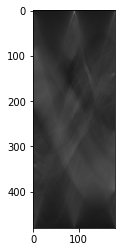

In [185]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)
[12630.81025605 12768.10908324 12810.02560854 12865.9833936
 12865.52349565 12930.49155599 12991.29107201 13091.92805162
 13216.89795914 13294.29654768 13397.77265073 13419.67506075
 13492.82060807 13555.07374985 13619.12070961 13737.58668815
 13820.03253726 13945.09414583 14025.15140733 14138.18767047
 14238.19276485 14274.7156552  14331.04321608 14366.21371337
 14500.30545739 14622.75535607 14788.5707325  14934.76929945
 14973.36805833 15008.92533286 15011.01687225 15082.83818148
 15161.72472828 15256.96860348 15394.12377228 15498.35094611
 15695.29735843 15860.53171735 16049.67800671 16149.80811106
 16187.23184961 16263.56178446 16337.82309818 16420.65606779
 16437.74506756 16467.30379647 16491.34010055 16494.67147281
 16567.17137117 16610.93099732 16718.87561218 16814.3940711
 16929.78156634 17046.4555498  17127.07027831 17261.43631782
 17358.03525297 17470.4916879  17532.22254197 17591.86036106
 17677.563675   17684.75236733 17746.84285167 17856.85675265
 18098.45367948 183

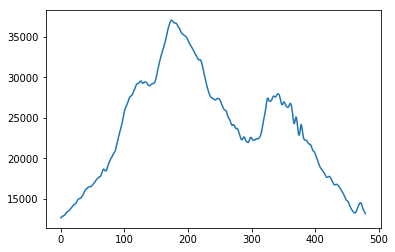

0


In [186]:
b = sinogram1[:,30]
print(b.shape)
print(b)
print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [180]:
# bt = np.flipud(b)
# sym = np.abs(b-bt)
# print(sym)
# print(np.mean(sym))

In [181]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 514.40833333  419.38063574  599.78292112  871.25527924 1154.62839635
 1429.97551016 1695.34031565 1945.48125669 2183.06638563 2408.91545314
 2622.75494536 2825.42003896 3021.11959294 3208.970289   3388.91805704
 3558.19122005 3719.0308455  3869.22818687 4011.36217677 4146.80525569
 4269.12929977 4372.45388739 4466.93628784 4553.17555577 4630.54446906
 4707.7537783  4785.4593799  4858.98126393 4933.19756664 5006.08968341
 5083.97912832 5165.84345259 5249.51988498 5332.75124705 5412.80255526
 5489.76697166 5560.65257114 5625.10203717 5658.00090201 5659.11181601
 5639.81056297 5608.87601698 5570.03820638 5520.94555472 5466.79540368
 5407.67923494 5336.65189989 5262.12944195 5180.9723901  5101.30621876
 5020.97246623 4940.5757075  4861.61927818 4982.51676784 5142.17275542
 5293.81626268 5439.81391872 5578.3908286  5715.48047421 5852.69259564
 5989.66128624 6124.19546328 6251.06767648 6369.52359091 6483.64607106
 6588.24350534 6683.19327363 6772.35524388 6865.7313621  6975.1180448
 7070.1

In [169]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

12
27
34
49
52
61
75
104
107
145
149
151
156
169
175
count 15


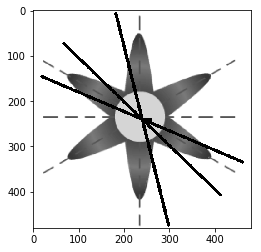

In [145]:
# img = cv2.imread("../images/ball90.png",0)
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(count):    
    c0 = np.rint(240*np.cos(((180-d[i])/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-d[i])/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
    img = cv2.line(img,(240,240),(260,240),(0,0,0),5)
    plt.imshow(img, cmap='gray')

